# An Introduction to Loops: The Monty Hall Problem

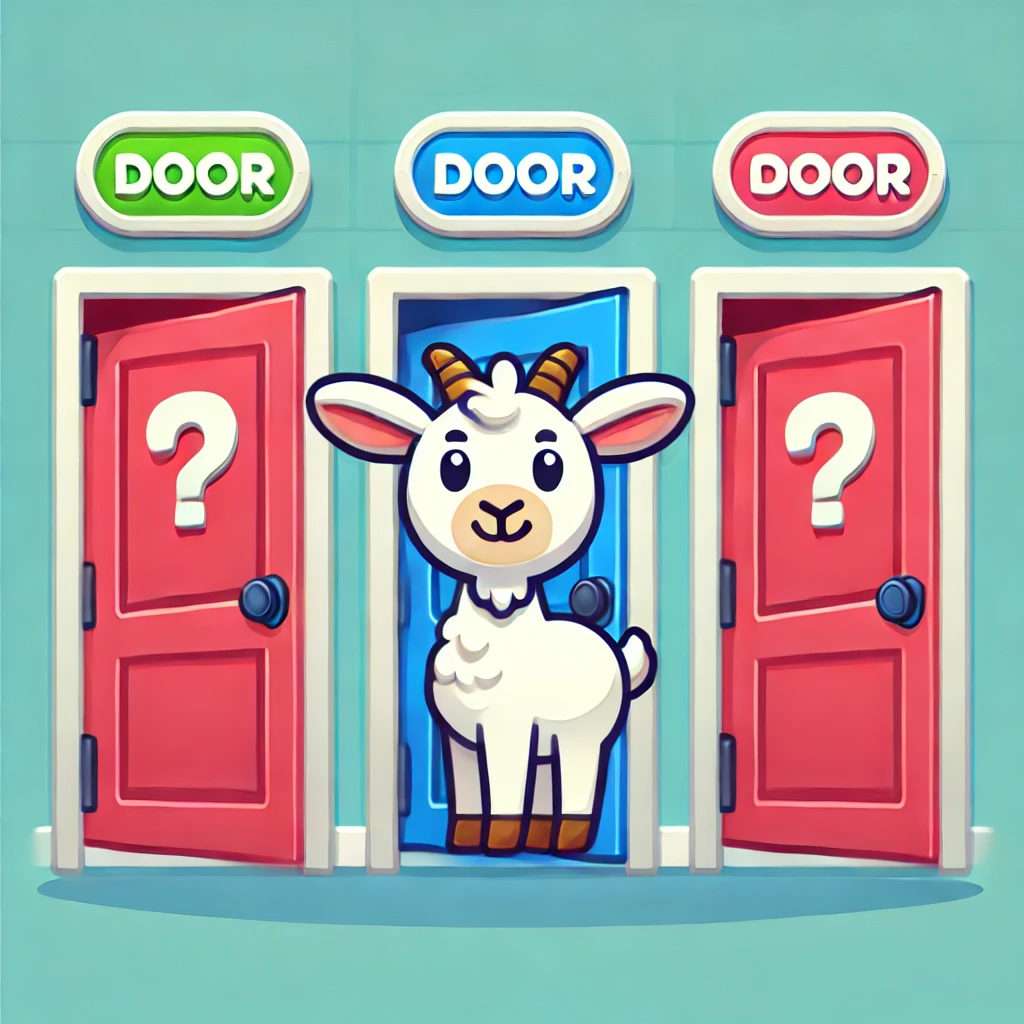


# Step 1: Understanding the problem



In short, here is the problem:

In the 70s, a popular gameshow hosted by Monty Hall had a segment that featured three doors. Behind two of the doors were goats, and behind one was a fancy sports car. Monty Hall would ask contestants to pick a door of the three and reveal that one of the remaining doors was hiding a goat. The contestant would then be faced with two closed doors, one of which they originally chose. Monty would then ask the contestant if they would like to stick with their original choice or switch to the other remaining door.

Marilyn Vos Savant, the one time high-score holder for the IQ test, wrote a newspaper column where readers could write in with math and logic problem. Marilyn was sent a desription of this gameshow with the question "Should the contestant switch doors?", called the "Monty Hall Problem". She confidently answered that yes, switching doors increases the probability that you win the car. 

This was followed by floods of letters to Marilyn's columnn, stating that she could not be correct. This made no sense to her readers. Academics and scientists joined in, leading to further confusion. Many prominent mathematicians disagreed with Marilyn's conclusion.

To understand the Monty Hall problem and how it can tear relationships apart, watch this short YouTube video (Just the first minute)

https://www.youtube.com/watch?v=AD6eJlbFa2I

### Our goal:

- Can we use Python to provide a definitive answer to the Monty Hall problem?

# Step 2: Initialize Monty

We need start up our gameshow host! I've written our Monty in a function. Run the two cells below to import the libraries we will need and initialize Monty. Don't wory about understanding the code. We will get to that later! First, we just want to understand the problem a little better.

You can run cells and jump to the next in a jupyter notebook by pressing Ctrl+Shift

In [452]:
import numpy
import random
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [453]:
def choose_random_except(exclude, start, end):
    numbers = [i for i in range(start, end + 1) if i != exclude]
    return random.choice(numbers)

def gaslight(choice1):
    babble = ['Tough decision tough decision....', 'You know I\'ve always loved doors myself.',
             f'Door number {choice1}... now doesn\'t that look like a reliable door?', 
             'Do you hear that? The audience is chanting STAY STAY.', 
              'Do you hear that? The audience is chanting SWITCH SWITCH.',
             'I would stay. But that\'s just me personally.',
             'I would switch. But that\'s just me personally.',
             f'Door {choice1}... I just don\'t trust it.']
    for i in range(random.randint(0, 2)):
        q = random.choice(babble)
        print(q)


def monty(ndoors = 3):

    #Make our doors
    print(' ---  ' * ndoors)
    for i in range(1, ndoors + 1):
            print(f'| {i} | ', end = '')
    print()
    print('|   | ' * ndoors)
    print('|o  | ' * ndoors)
    print('|   | ' * ndoors)
    print(' ---  ' * ndoors)
    
    #Randomly pick a winning door
    pick = random.randint(1, ndoors)
    
    #Prompt the user to make a choice for the first door
    choice1 = input('Hello contestant! One of these doors hides a secret treasure. The others are empty and meaningless. Please pick a door. ')
    choice1 = int(choice1)

    #Decide which doors we should open to trick the contestant
    all_doors = np.arange(1,ndoors+1)
    if pick == choice1:
        false_door = choose_random_except(pick, 1, ndoors)
        open_doors = np.delete(all_doors, [pick-1, false_door-1])
        #print(open_doors)

    else:
        open_doors = np.delete(all_doors, [pick-1, choice1-1])
        false_door = 0
        #print(open_doors)
    if len(open_doors) == 1:
        print(f'You chose door number {choice1}! Let\'s take a look at what you missed behind door {(open_doors)[0]} ')
    else:
        print(f'You chose door number {choice1}! Let\'s take a look at what you missed.')
    
    #Open all but one door the player did not choose
    time.sleep(2) 
    
    
    # Make our doors
    print(' ---  ' * ndoors) 

    # Print the door numbers
    for i in range(1, ndoors + 1):
        if i in open_doors:
            print(f'||||| ', end='')  # Open door
        else:
            print(f'| {i} | ', end='')  # Closed door with the number
    print()

    # Print the rest of the doors
    for i in range(1, ndoors + 1):
        if i in open_doors:
            print('||||| ', end='')  
        else:
            print('|   | ', end='') 
    print()

    for i in range(1, ndoors + 1):
        if i in open_doors:
            print('||||| ', end='')
        else:
            print('|o  | ', end='') 
    print()
    for i in range(1, ndoors + 1):
        if i in open_doors:
            print('||||| ', end='')  
        else:
            print('|   | ', end='')  
    print()
    #Bottoms of the doors
    print(' ---  ' * ndoors)  

    #Identify the remaining closed door that user has not chosen
    for d in all_doors:
        if d != choice1:
            if d not in open_doors:
                other_door = d
    
    #Propmpt the contestant to chose another door if they want, babble if they need to think.
    print('So empty!')
    time.sleep(1)
    if choice1 == pick:
        print(f'Ok contestant! Two doors remain. Would you like to keep your original choice, door {choice1}, or switch to door {false_door}?')
        switch = input('[Y/N/M], type Y to switch, N to stay, or M to continue thinking.')
    else:
        print(f'Ok contestant! Two doors remain. Would you like to keep your original choice, door {choice1}, or switch to door {pick}?')
        switch = input('[Y/N/M], type Y to switch, N to stay, or M to continue thinking.')
        
    switch = switch.upper()
    gaslight(choice1)
    if switch == 'Y':
        choice2 = other_door

    elif switch == 'N':
        choice2 = choice1
    
    elif switch == 'M':
        print('----')
        gaslight(choice1)
        switch = input('[Y/N/M], type Y to switch, N to stay, or M to continue thinking.')
        switch = switch.upper()
        if switch == 'Y':
            choice2 = other_door

        elif switch == 'N':
            choice2 = choice1

        elif switch == 'M':
            print('----')
            gaslight(choice1)
            switch = input('[Y/N], type Y to switch, N to stay, or M to continue thinking.')
            switch = switch.upper()
            if switch == 'Y':
                choice2 = other_door

            elif switch == 'N':
                choice2 = choice1
        
    print(f'Behind door number {choice2}..... ')


    # Make our doors
    print(' ---  ' * ndoors) 
    # Print the middle parts
    for i in range(1, ndoors + 1):
        if i == pick:
            print(f'|*  | ', end='') 
        else:
            print(f'||||| ', end='')  
    print()
    for i in range(1, ndoors + 1):
        if i == pick:
            print('| * | ', end='')  
        else:
            print('||||| ', end='') 
    print()

    for i in range(1, ndoors + 1):
        if i == pick:
            print('| * | ', end='')  
        else:
            print('||||| ', end='') 
    print()
    for i in range(1, ndoors + 1):
        if i == pick:
            print('|  *| ', end='')  
        else:
            print('||||| ', end='')  
    print()
    #Bottom of the doors
    print(' ---  ' * ndoors)

    #Check to see if the contestant has won the big prize, let them know.
    if choice2 == pick:
        print('YOU WIN')

    elif choice2 != pick:
        print('YOU LOSE')

    print(f'Door number {pick} was the big winner.')

Run the cell below to start up our gameshow host! Re-run the cell and play a few games. Do you think you increase your chances of winning when you switch? Take a second to write down your thoughts in the cell below, or keep track of your wins! I've made you a "markdown" cell, which you can type normally in wihtout needing to comment out your text.

In [455]:
monty()

 ---   ---   ---  
| 1 | | 2 | | 3 | 
|   | |   | |   | 
|o  | |o  | |o  | 
|   | |   | |   | 
 ---   ---   ---  
Hello contestant! One of these doors hides a secret treasure. The others are empty and meaningless. Please pick a door. 2
You chose door number 2! Let's take a look at what you missed behind door 1 
 ---   ---   ---  
||||| | 2 | | 3 | 
||||| |   | |   | 
||||| |o  | |o  | 
||||| |   | |   | 
 ---   ---   ---  
So empty!
Ok contestant! Two doors remain. Would you like to keep your original choice, door 2, or switch to door 3?
[Y/N/M], type Y to switch, N to stay, or M to continue thinking.y
Door 2... I just don't trust it.
Do you hear that? The audience is chanting SWITCH SWITCH.
Behind door number 3..... 
 ---   ---   ---  
||||| ||||| |*  | 
||||| ||||| | * | 
||||| ||||| | * | 
||||| ||||| |  *| 
 ---   ---   ---  
YOU WIN
Door number 3 was the big winner.


Notes here!
---









## Problem 1: Building a Simulation 

(I hope) you learned a lot in the previous step and had a little fun. Next, we will take a scientific approach to discovering what's going on here. When we write code for research, we often work towards answering a specific question. Ours is:

**Do we improve our chance of winning Monty Hall's game by switching doors?**

To tackle our question, we need to generate some data to work with. We will start by initializeing a "bare-bones" version of our game. This is the same code you just played with, now without all the doors and print statements. We will use this, so go ahead and run the cell below.

In [478]:
def bare_monty(choice1, switch, ndoors = 3):
    """
    A bare-bones version of the Monty Hall problem. Just completes the game without prompting a player.
    ---
    Params
    ---
    
    choice1: int, initial door choice 
    
    switch: bool, indicates if player will switch doors when prompted
    
    ndoors: int, number of doors in the game
        by default ndoors = 3
    
    ---
    Returns
    ---
    
    bool: True for win, False for loss
    
    """
    
    #Hanging on to this function to fool proof the notebook. Best practice is to define this function
    #seperately and not call it every time.
    def choose_random_except(exclude, start, end):
        numbers = [i for i in range(start, end + 1) if i != exclude]
        return random.choice(numbers)

    
    #Randomly pick a winning door
    pick = random.randint(1, ndoors)


    #Decide which doors we should open to trick the contestant
    all_doors = np.arange(1,ndoors+1)
    if pick == choice1:
        false_door = choose_random_except(pick, 1, ndoors)
        open_doors = np.delete(all_doors, [pick-1, false_door-1])
    else:
        open_doors = np.delete(all_doors, [pick-1, choice1-1])
        false_door = 0


    #Identify the remaining closed door that user has not chosen
    for d in all_doors:
        if d != choice1:
            if d not in open_doors:
                other_door = d
    #Switch the door if the user specified we should
    if switch == True:
        choice2 = other_door
    else:
        choice2 = choice1
        
    #Return a True or False for a win or loss
    if choice2 == pick:
        return True

    else:
        return False

## Problem 1.1:

Use our bare_monty function to run 100 games. We will take this step by step and:

1. Run 100 games without switching doors, report the fraction of wins for these games.

2. Run 100 games with switching doors, report the fraction of wins for these games.

3. Run both game simulations a few times. Do the results change much?

**Step 1:**

In [467]:
#Initialize a variable "wins" to be zero
wins = 0
#Start our first loop! 
#This line initializes a range of integers from 1 to 100 and tells python to loop through each integer
for i in range(100):
    #Our next line is indented (offset by one tab). This is how Python knows for every iteration
    #of our loop, it needs to do this task.
    #On this line, we call our bare_monty function and store the result in a variable called "result"
    result = bare_monty(choice1 = 2, switch = False)
    #Finally, we check the result. A double = in Python is asking Python if the statement is true while 
    #a single = in Python tells Python that something is true.
    #Our if statement tells Python only to continue to the next line if the "win" variable is true.
    if result == True:
        #We need to indent the code again to tell Python that this code goes with this loop.
        #Complete the code (by replacing the ???) to update the variable "wins" to increase by 1 
        #if the win condition is satisfied.
        ?????
        #HINT: most of learning Python is getting comfortable Googling things. Feel free to do that here!

What was the win/loss ratio? Print it in the cell below.

**Step 2:** Let's switch! re-run your code but with the door switched this time. Put your code to acomplish this in the next cell (feel free to start by copy/pasting your code from the last step).

HINT: Lost? Try using Python's help function on my function! This will pull up the "doc string" and give you more information about all the function's variables.

In [479]:
help(bare_monty)

Help on function bare_monty in module __main__:

bare_monty(choice1, switch, ndoors=3)
    A bare-bones version of the Monty Hall problem. Just completes the game without prompting a player.
    ---
    Params
    ---
    
    choice1: int, initial door choice 
    
    switch: bool, indicates if player will switch doors when prompted
    
    ndoors: int, number of doors in the game
        by default ndoors = 3
    
    ---
    Returns
    ---
    
    bool: True for win, False for loss



What was the win/loss ratio this time?

**Step 3:**

Re-run your previous code a few times. In Jupyter notebooks, the order you run your cells matters, so make sure you run your simulated games and then the code that generates the win/loss ratio. Do they change much? Take a second to play around with it and write your observations down in the cell below:

Notes
---






# Problem 1.2:

Use our simulation code to run larger simulations and see if the behavior converges

Again, let's do this in a few steps:

1. Build a function we can call for a specified sizes of simulations

2. Run our function for increasing sizes of simulated games to see if the win/loss ratio converges to a value

3. Plot our simulations to look for convergence


**Step 1:** Create your function

I've givine you a skeleton again to make your function. Go through it and replace the ??? markers with the correct code to make the function run. Your function should:

- Take an input range size that indicates the number of simulated games you want to run
- Take another input that indicates if the simulated game contestants should switch their guess
- Keep track of the number of wins 
- Return the ratio of wins to games played

You are mostly just adapting your code from the last problem in to a function you can use, so reference that.

In [449]:
#We define a function we want to call later with this "def" keyword. Any variables you indicate within the 
#parenthesis will be required by as inputs from a user that runs the function. We need a keyword that indicates
# if we are switching (switch) and the range (rng).
def game_sim(switch, rng):
    #Initialize our wins variable
    wins = 0
    #Specify what Python needs to loop over
    for ???:
        #Call your bare_monty function to play the game
        result = bare_monty(choice1 = 2, switch = switch)
        if result == True:
            #Update the wins variable
            ???
    #Return the ratio
    return ???

**Step 2**: Use the values I defined in the list below to run your function for each of the specified ranges. I'm going to let you write your own for loop for this one! Your code should:

- loop through each of the values in the ranges array (this should be the first line in your for loop)
- run the simulation for one particular range in the rnages list
- add the win/plays ratio to a list so you can plot them later. I've initialized an empty list for you, which I've called "ratios".

Remember to Google if you get lost!!

In [ ]:
ranges = np.array([50, 1e2, 1e3, 2e3, 3e3, 4e3, 5e3, 7e3, 9e3, 3e4, 5e4], dtype = int)

In [450]:
#For this block, run the simulations for contestants that DO switch doors.

ratios = []
for ???:
    ??????

The next cell will plot your ratios for you:

In [ ]:
plt.plot(ranges, ratios, marker = 'x')


plt.xlabel('Number of Games')
plt.ylabel('wins/total games')
plt.title('Swtching Doors');

What was the mean ratio in your list? Feel free to use a numpy function:

Now repeat the for loop you wrote, this time for contestants that DO NOT switch doors.

In [445]:
#Start with the code you wrote in the previous step
????
    ???
        ??????

Again, you can plot your results with this code:

In [ ]:
plt.plot(ranges, ratios, marker = 'x')

plt.xlabel('Number of Games')
plt.ylabel('wins/total games')
plt.title('Not Swtching Doors');

And print out your mean ratio:

Ok so you've gathered all your data, now it's time to analyze! What's going on? Are your simulations converging to particular values? Is there a significant increase or decrease in probability if you do or do not switch doors? Take a moment to collect your thoughts below. Then read on and we can talk about what is going on with the Mark Hall problem.

NOTES
---































**Bonus:** Those plots are not pretty!! Feel free to use the functionality of matpliotlib to make your own stylistic choices and work to increase the readability.

# Problem 2: Solving the Monty Hall Problem

We've collected our data, now we interpret! You saw in the previous step that when you increased the size of your simulations that the data did start to converge on certain values. When I ran this excercise (my solutions are at the end of this notebook) I found that the win ratio for contestants that did not switch was about .33 and the probability for those who DID switch was about .66. Or 1/3 and 2/3. 

This is an unintuitive result. We had no knowledge of what was behind the doors at any point, but jumping to the second door had a significant increase in our win probability. Let's break it down in to probabilites.

When you initially picked a door, there was a 1/3 chance that door contained the car, and a 2/3 chance that one of the two remaining doors had the car. Think of that 2/3 probability as belonging to both of the two unchosen doors collectively. When Monty opened one of the un-chosen doors and revealed the goat, that 2/3 probability still pertained to the two doors, but you now know one of those doors has 0 probability of hiding a car. The 2/3 probability is now the probability that the single closed, unchosen door is hiding the car. It is in your best interest to switch.



## But you said mathematicians had proven Marilyn wrong!

We've seen this result in our data and we can rationalize the result, but the result is unintuitive. It is our responsibility as good scientists to convince ourselves that our answer is correct, and that is what we will do in this next problem!

At the begining I mentioned that when Marilyn published her solution, many people, from readers to prominent mathematicians, disputed her solution. Let's take a look at the counter-argument presented by several math Phds in a counter-column they published together. Their argument was similar to what her readers had argued: 

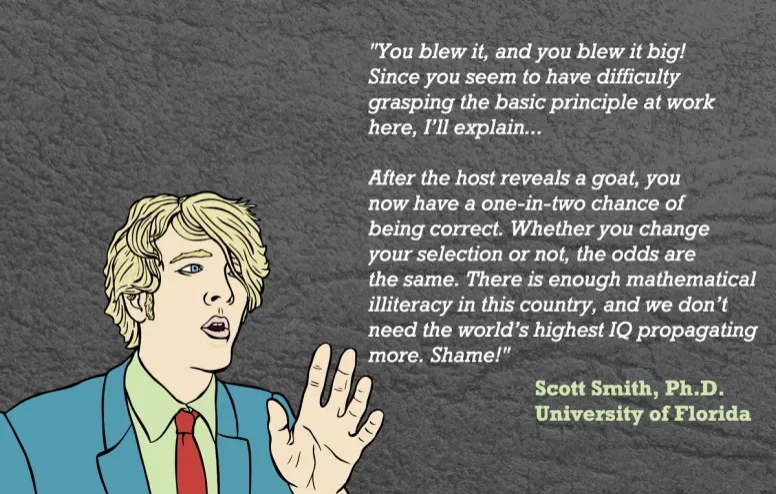
https://priceonomics.com/the-time-everyone-corrected-the-worlds-smartest/



For the mathy part here, I'm following this website: https://brilliant.org/wiki/monty-hall-problem/

Being good PhDs, these mathematicians outlined their counter-argument with math. Using Baye's theorum, we can write out the likelihood of blindly picking the door with a car behind it where:

H stands for Hypothesis. This is our initial guess that door X is the one with a car behind it. 

E stands for Evidence. This is the component Monty introduces by revelaing a goat.

P is a given probability 

We want $P(H \mid E)$, or the probability our hypothesis is correct given the evidence revealed by Monty.

We can write out this probability as:

$
P(H \mid E) = \frac{P(E \mid H) P(H)}{P(E)} P(H) = \frac{P(E \mid H) \times P(H)}{P(E \mid H) \times P(H) + P(E \mid \text{not } H) \times P(\text{not } H)}.
$

Piece by piece, P(H) is the probability our hypothesis is correct, which of course is $\frac{1}{3}$. P(not H) is the probability our hypothesis is not correct, or $\frac{2}{3}$. P(E|H) is the probability Monty shows a door with a goat. By definition of the problem, this probability is 1. P(E| not H) is the probability that Monty picks a door that has a goat behind it. Since we knoe of the two remaining doors has a goat behind it, this probability is \frac{1}{2}. Our probability that our initial guess was correct is then:

$
P(H \mid E) = \frac{P(E \mid H) \times P(H)}{P(E \mid H) \times P(H) + P(E \mid \text{not } H) \times P(\text{not } H)} = \frac{1 \times \frac{1}{3}}{1 \times \frac{1}{3} + \frac{1}{2} \times \frac{2}{3}} = \frac{\frac{1}{3}}{\frac{1}{3} + \frac{1}{3}} = \frac{1}{2}.
$

We are then have a 50\% probability of winning with our original guess, and it is not mathematically possible that switching will increase our chances at winning.

# Problem 2.1: 

**What do you think?** Given the evidence you have from your simulations and the formulas these math PhDs have come up with, do you think a contestant should switch doors to increase the probability they win? 

HINT: when I see a physics or math claim I know is not correct, I always start by looking at the assumptions that went in to the argument. What did the math PhDs assume to arive at this conclusion? Have some thoughts about this below, and remember my solutions are at the end of the notebook.

NOTES
---








# Problem 2.2: Convincing Ourselves with New Doors

A good nail-in-the-coffin way to convince ourselves of the Monty Hall problem is to no longer limit ourselves to 3 doors. Imagine instead Monty had 10 doors. You make your choice, and now he opens all but 1 of the remaining doors, leaving you 2 to choose from. The door you have the option to switch to now has a much higher probability of being the winning door. Let's return to our original Monty and play a few game with 10 doors instead of 3.:

In [ ]:
monty(ndoors = 10)

# Problem 2.3

Now draw on the code you wrote in problem 1. Repeat your steps, now specifying to your monty funtion that he has 10 doors to play with. What is the probability of winning the game if you do not switch doors? What is the probability of winning if you do switch doors?

Take the following steps:
- repeat your code to define your game_sim function, this time passing the bare_monty function the keyword ndoors = 10
- re-make your grpahs for switching and not switching doors
- read and interpret your graphs. What do you think? Is the Monty Hall problem more clear to you considering these graphs?

Read your plots: Does this make sense?

NOTES
---







# Problem 3: 

**Challenge problem** 



I'll put a challenge problem here I haven't finished writing. Students will alter monty to BLINDLY randomly pick a door and show that if this were the case, the math PhDs would be right. 

# SOLUTIONS

Below are my solutions to all the problems


## Problem 1.1:

Use our bare_monty function to run 100 games. We will take this step by step and:

1. Run 100 games without switching doors, report the fraction of wins for these games.

2. Run 100 games with switching doors, report the fraction of wins for these games.

3. Run both game simulations a few times. Do the results change much?

In [473]:
#Initialize a variable "wins" to be zero
wins = 0
#Start our first loop! 
#This line initializes a range of integers from 1 to 100 and tells python to loop through each integer
for i in range(100):
    #Our next line is indented (offset by one tab). This is how Python knows for every iteration
    #of our loop, it needs to do this task.
    #On this line, we call our bare_monty function and store the result in a variable called "result"
    result = bare_monty(choice1 = 2, switch = False)
    #Finally, we check the result. A double = in Python is asking Python if the statement is true while 
    #a single = in Python tells Python that something is true.
    #Our if statement tells Python only to continue to the next line if the "win" variable is true.
    if result == True:
        #We need to indent the code again to tell Python that this code goes with this loop.
        #Complete the code (by replacing the ???) to update the variable "wins" to increase by 1 
        #if the win condition is satisfied.
        wins+=1
        #HINT: most of learning Python is getting comfortable Googling things. Feel free to do that here!

What was the win/loss ratio? Print it in the cell below.

In [474]:
wins/100

0.28

**Step 2:** Let's switch! re-run your code but with the door switched this time. Put your code to acomplish this in the next cell (feel free to start by copy/pasting your code from the last step).

In [475]:
wins = 0
for i in range(100):
    result = bare_monty(choice1 = 2, switch = True)
    if result == True:
        wins+=1

What was the win/loss ratio?

In [476]:
wins/100

0.71

**Step 3:** I noticed that the values hovered around .3 and .6, but changed a lot the more I ran my cells.

# Problem 1.2:

Use our simulation code to run larger simulations and see if the behavior converges

Again, let's do this in a few steps:

1. Build a function we can call for a specified sizes of simulations

2. Run our function for increasing sizes of simulated games to see if the win/loss ratio converges to a value

3. Plot our simulations to look for convergence


**Step 1:** Create your function

I've givine you a skeleton again to make your function. Go through it and replace the ??? markers with the correct code to make the function run. Your function should:

- Take an input range size that indicates the number of simulated games you want to run
- Take another input that indicates if the simulated game contestants should switch their guess
- Keep track of the number of wins 
- Return the ratio of wins to games played

In [481]:
#We define a function we want to call later with this "def" keyword. Any variables you indicate within the 
#parenthesis will be required by as inputs from a user that runs the function. We need a keyword that indicates
# if we are switching (switch) and the range (rng).
def game_sim(switch, rng):
    #Initialize our wins variable
    wins = 0
    #Specify what Python needs to loop over
    for i in range(rng):
        #Call your bare_monty function to play the game
        result = bare_monty(choice1 = 2, switch = switch)
        if result == True:
            #Update the wins variable
            wins+=1
    #Return the ratio
    return wins/rng

**Step 2**: Use the values I defined in the list below to run your function for each of the specified ranges. I'm going to let you write your own for loop for this one! Your code should:

- loop through each of the values in the ranges array (this should be the first line in your for loop)
- run the simulation for one particular range in the rnages list
- add the win/plays ratio to a list so you can plot them later. I've initialized an empty list for you, which I've called "ratios".

Remember to Google if you get lost!!

In [501]:
ranges = np.array([50, 1e2, 1e3, 2e3, 3e3, 4e3, 5e3, 7e3, 9e3, 3e4, 5e4], dtype = int)

ratios = []
for val in ranges:
    ratio = game_sim(switch = True, rng = val)
    ratios.append(ratio)

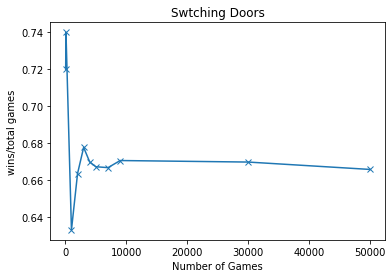

In [502]:
plt.plot(ranges, ratios, marker = 'x')


plt.xlabel('Number of Games')
plt.ylabel('wins/total games')
plt.title('Swtching Doors');

What was the mean ratio in your list? Feel free to use a numpy function:

In [503]:
np.mean(ratios)

0.676714531024531

Now repeat the for loop you wrote, this time for contestants that DO NOT switch doors.

In [498]:
ratios = []
for val in ranges:
    ratio = game_sim(switch = False, rng = val)
    ratios.append(ratio)

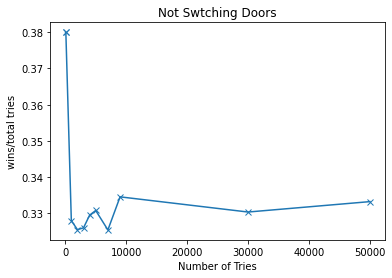

In [499]:
plt.plot(ranges, ratios, marker = 'x')

plt.xlabel('Number of Tries')
plt.ylabel('wins/total tries')
plt.title('Not Swtching Doors');

In [500]:
np.mean(ratios)

0.33849007215007215

# Problem 2.1: 

**What do you think?** Given the evidence you have from your simulations and the formulas these math PhDs have come up with, do you think a contestant should switch doors to increase the probability they win? 

HINT: when I see a physics or math claim I know is not correct, I always start by looking at the assumptions that went in to the argument. What did the math PhDs assume to arive at this conclusion? Have some thoughts about this below, and remember my solutions are at the end of the notebook.

# Problem 2.2

In [519]:
monty(ndoors = 10)

 ---   ---   ---   ---   ---   ---   ---   ---   ---   ---  
| 1 | | 2 | | 3 | | 4 | | 5 | | 6 | | 7 | | 8 | | 9 | | 10 | 
|   | |   | |   | |   | |   | |   | |   | |   | |   | |   | 
|o  | |o  | |o  | |o  | |o  | |o  | |o  | |o  | |o  | |o  | 
|   | |   | |   | |   | |   | |   | |   | |   | |   | |   | 
 ---   ---   ---   ---   ---   ---   ---   ---   ---   ---  
Hello contestant! One of these doors hides a secret treasure. The others are empty and meaningless. Please pick a door. 1
You chose door number 1! Let's take a look at what you missed.
 ---   ---   ---   ---   ---   ---   ---   ---   ---   ---  
| 1 | ||||| ||||| ||||| ||||| ||||| | 7 | ||||| ||||| ||||| 
|   | ||||| ||||| ||||| ||||| ||||| |   | ||||| ||||| ||||| 
|o  | ||||| ||||| ||||| ||||| ||||| |o  | ||||| ||||| ||||| 
|   | ||||| ||||| ||||| ||||| ||||| |   | ||||| ||||| ||||| 
 ---   ---   ---   ---   ---   ---   ---   ---   ---   ---  
So empty!
Ok contestant! Two doors remain. Would you like to keep your original ch

# Problem 2.3

Now draw on the code you wrote in problem 1. Repeat your steps, now specifying to your monty funtion that he has 10 doors to play with. What is the probability of winning the game if you do not switch doors? What is the probability of winning if you do switch doors?

Take the following steps:
- repeat your code to define your game_sim function, this time passing the bare_monty function the keyword ndoors = 10
- re-make your grpahs for switching and not switching doors
- read and interpret your graphs. What do you think? Is the Monty Hall problem more clear to you considering these graphs?

In [514]:
def game_sim(switch, rng):
    #Initialize our wins variable
    wins = 0
    #Specify what Python needs to loop over
    for i in range(rng):
        #Call your bare_monty function to play the game
        result = bare_monty(choice1 = 2, switch = switch, ndoors = 10)
        if result == True:
            #Update the wins variable
            wins+=1
    #Return the ratio
    return wins/rng

In [515]:
ranges = np.array([50, 1e2, 1e3, 2e3, 3e3, 4e3, 5e3, 7e3, 9e3, 3e4, 5e4], dtype = int)

ratios = []
for val in ranges:
    ratio = game_sim(switch = True, rng = val)
    ratios.append(ratio)

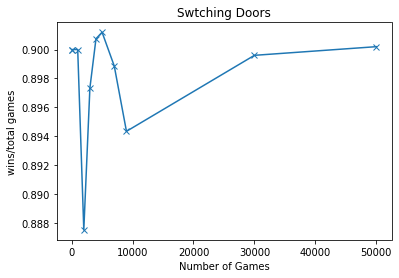

In [516]:
plt.plot(ranges, ratios, marker = 'x')


plt.xlabel('Number of Games')
plt.ylabel('wins/total games')
plt.title('Swtching Doors');

In [517]:
ratios = []
for val in ranges:
    ratio = game_sim(switch = False, rng = val)
    ratios.append(ratio)

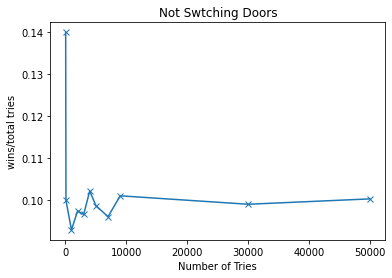

In [518]:
plt.plot(ranges, ratios, marker = 'x')

plt.xlabel('Number of Tries')
plt.ylabel('wins/total tries')
plt.title('Not Swtching Doors');